# Lecture 3: Getting the Data

### Part 1. Reading text file

The first step to working with a text file is to obtain a *file* object using open: 
``` python
# 'r' means read-only
file_for_reading = open('reading_file.txt', 'r')

# 'w' is write -- will destroy the file if it already exists!
file_for_writing = open('writing_file.txt', 'w')

# 'a' is append -- for adding to the end of the file
file_for_appending = open('appending_file.txt', 'a') 

# don't forget to close your files when you're done
file_for_writing.close()
```
Because it is easy to forget to close your files, you should always use them in a *with* block, at the end of which they will be closed automatically:

``` python
with open(filename,'r') as f:
    data = function_that_gets_data_from(f)

# at this point f has already been closed, so don't try to use it
process(data)
```

Sometimes the file you are working with is too big and doesn't fit in memory. You can work *data stream* instead by  iterating over the lines of the file using *for*:

``` python
starts_with_hash = 0
with open('input.txt','r') as f: 
    # look at each line in the file
    for line in file:
        # use a regex to see if it starts with '#'
        if re.match("^#",line): 
            # if it does, add 1 to the count
            starts_with_hash += 1
```
            
    
Every line you get this way ends in a newline character, so you’ll often want to *strip()* it before doing anything with it.

For example, imagine you have a file full of email addresses, one per line, and that you need to generate a histogram of the domains. The rules for correctly extracting domains are somewhat subtle (e.g., the Public Suffix List), but a good first approximation is to just take the parts of the email addresses that come after the @. (Which gives the wrong answer for email addresses like joel@mail.datasciencester.com.)

``` python
def get_domain(email_address):
    """split on '@' and return the last piece""" 
    return email_address.lower().split("@")[-1]

with open('email_addresses.txt', 'r') as f: 
    domain_counts = Counter(get_domain(line.strip()) for line in f if "@" in line)
```

*Source: Joel Grus, Data Science from Scratch First Principles with Python*

## Part 2: Working with delimited files

I recommend using pandas for handling CSV, TSV, XLSX files.


### Load a csv


```python
df = pd.read_csv('../data/example.csv')
df
```


<div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Unnamed: 0</th>
      <th>first_name</th>
      <th>last_name</th>
      <th>age</th>
      <th>preTestScore</th>
      <th>postTestScore</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0</td>
      <td>Jason</td>
      <td>Miller</td>
      <td>42</td>
      <td>4</td>
      <td>25,000</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>Molly</td>
      <td>Jacobson</td>
      <td>52</td>
      <td>24</td>
      <td>94,000</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2</td>
      <td>Tina</td>
      <td>.</td>
      <td>36</td>
      <td>31</td>
      <td>57</td>
    </tr>
    <tr>
      <th>3</th>
      <td>3</td>
      <td>Jake</td>
      <td>Milner</td>
      <td>24</td>
      <td>.</td>
      <td>62</td>
    </tr>
    <tr>
      <th>4</th>
      <td>4</td>
      <td>Amy</td>
      <td>Cooze</td>
      <td>73</td>
      <td>.</td>
      <td>70</td>
    </tr>
  </tbody>
</table>
</div>



### Load a csv with no headers


```python
df = pd.read_csv('../data/example.csv', header=None)
df
```




<div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>0</th>
      <th>1</th>
      <th>2</th>
      <th>3</th>
      <th>4</th>
      <th>5</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>NaN</td>
      <td>first_name</td>
      <td>last_name</td>
      <td>age</td>
      <td>preTestScore</td>
      <td>postTestScore</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.0</td>
      <td>Jason</td>
      <td>Miller</td>
      <td>42</td>
      <td>4</td>
      <td>25,000</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1.0</td>
      <td>Molly</td>
      <td>Jacobson</td>
      <td>52</td>
      <td>24</td>
      <td>94,000</td>
    </tr>
    <tr>
      <th>3</th>
      <td>2.0</td>
      <td>Tina</td>
      <td>.</td>
      <td>36</td>
      <td>31</td>
      <td>57</td>
    </tr>
    <tr>
      <th>4</th>
      <td>3.0</td>
      <td>Jake</td>
      <td>Milner</td>
      <td>24</td>
      <td>.</td>
      <td>62</td>
    </tr>
    <tr>
      <th>5</th>
      <td>4.0</td>
      <td>Amy</td>
      <td>Cooze</td>
      <td>73</td>
      <td>.</td>
      <td>70</td>
    </tr>
  </tbody>
</table>
</div>



### Load a csv while specifying column names


```python
df = pd.read_csv('../data/example.csv', names=['UID', 'First Name', 'Last Name', 'Age', 'Pre-Test Score', 'Post-Test Score'])
df
```




<div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>UID</th>
      <th>First Name</th>
      <th>Last Name</th>
      <th>Age</th>
      <th>Pre-Test Score</th>
      <th>Post-Test Score</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>NaN</td>
      <td>first_name</td>
      <td>last_name</td>
      <td>age</td>
      <td>preTestScore</td>
      <td>postTestScore</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.0</td>
      <td>Jason</td>
      <td>Miller</td>
      <td>42</td>
      <td>4</td>
      <td>25,000</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1.0</td>
      <td>Molly</td>
      <td>Jacobson</td>
      <td>52</td>
      <td>24</td>
      <td>94,000</td>
    </tr>
    <tr>
      <th>3</th>
      <td>2.0</td>
      <td>Tina</td>
      <td>.</td>
      <td>36</td>
      <td>31</td>
      <td>57</td>
    </tr>
    <tr>
      <th>4</th>
      <td>3.0</td>
      <td>Jake</td>
      <td>Milner</td>
      <td>24</td>
      <td>.</td>
      <td>62</td>
    </tr>
    <tr>
      <th>5</th>
      <td>4.0</td>
      <td>Amy</td>
      <td>Cooze</td>
      <td>73</td>
      <td>.</td>
      <td>70</td>
    </tr>
  </tbody>
</table>
</div>



### Load a csv with setting the index column to UID


```python
df = pd.read_csv('../data/example.csv', index_col='UID', names=['UID', 'First Name', 'Last Name', 'Age', 'Pre-Test Score', 'Post-Test Score'])
df
```




<div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>First Name</th>
      <th>Last Name</th>
      <th>Age</th>
      <th>Pre-Test Score</th>
      <th>Post-Test Score</th>
    </tr>
    <tr>
      <th>UID</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>NaN</th>
      <td>first_name</td>
      <td>last_name</td>
      <td>age</td>
      <td>preTestScore</td>
      <td>postTestScore</td>
    </tr>
    <tr>
      <th>0.0</th>
      <td>Jason</td>
      <td>Miller</td>
      <td>42</td>
      <td>4</td>
      <td>25,000</td>
    </tr>
    <tr>
      <th>1.0</th>
      <td>Molly</td>
      <td>Jacobson</td>
      <td>52</td>
      <td>24</td>
      <td>94,000</td>
    </tr>
    <tr>
      <th>2.0</th>
      <td>Tina</td>
      <td>.</td>
      <td>36</td>
      <td>31</td>
      <td>57</td>
    </tr>
    <tr>
      <th>3.0</th>
      <td>Jake</td>
      <td>Milner</td>
      <td>24</td>
      <td>.</td>
      <td>62</td>
    </tr>
    <tr>
      <th>4.0</th>
      <td>Amy</td>
      <td>Cooze</td>
      <td>73</td>
      <td>.</td>
      <td>70</td>
    </tr>
  </tbody>
</table>
</div>



### Load a csv while setting the index columns to First Name and Last Name


```python
df = pd.read_csv('../data/example.csv', index_col=['First Name', 'Last Name'], names=['UID', 'First Name', 'Last Name', 'Age', 'Pre-Test Score', 'Post-Test Score'])
df
```




<div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>UID</th>
      <th>Age</th>
      <th>Pre-Test Score</th>
      <th>Post-Test Score</th>
    </tr>
    <tr>
      <th>First Name</th>
      <th>Last Name</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>first_name</th>
      <th>last_name</th>
      <td>NaN</td>
      <td>age</td>
      <td>preTestScore</td>
      <td>postTestScore</td>
    </tr>
    <tr>
      <th>Jason</th>
      <th>Miller</th>
      <td>0.0</td>
      <td>42</td>
      <td>4</td>
      <td>25,000</td>
    </tr>
    <tr>
      <th>Molly</th>
      <th>Jacobson</th>
      <td>1.0</td>
      <td>52</td>
      <td>24</td>
      <td>94,000</td>
    </tr>
    <tr>
      <th>Tina</th>
      <th>.</th>
      <td>2.0</td>
      <td>36</td>
      <td>31</td>
      <td>57</td>
    </tr>
    <tr>
      <th>Jake</th>
      <th>Milner</th>
      <td>3.0</td>
      <td>24</td>
      <td>.</td>
      <td>62</td>
    </tr>
    <tr>
      <th>Amy</th>
      <th>Cooze</th>
      <td>4.0</td>
      <td>73</td>
      <td>.</td>
      <td>70</td>
    </tr>
  </tbody>
</table>
</div>





### Load a csv while specifying "." as missing values


```python
df = pd.read_csv('../data/example.csv', na_values=['.'])
pd.isnull(df)
```




<div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Unnamed: 0</th>
      <th>first_name</th>
      <th>last_name</th>
      <th>age</th>
      <th>preTestScore</th>
      <th>postTestScore</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
    </tr>
    <tr>
      <th>1</th>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
    </tr>
    <tr>
      <th>2</th>
      <td>False</td>
      <td>False</td>
      <td>True</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
    </tr>
    <tr>
      <th>3</th>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>True</td>
      <td>False</td>
    </tr>
    <tr>
      <th>4</th>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>False</td>
      <td>True</td>
      <td>False</td>
    </tr>
  </tbody>
</table>
</div>



### Load a csv while specifying "." and "NA" as missing values in the Last Name column and "." as missing values in Pre-Test Score column


```python
sentinels = {'Last Name': ['.', 'NA'], 'Pre-Test Score': ['.']}
```


```python
df = pd.read_csv('../data/example.csv', na_values=sentinels)
df
```




<div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Unnamed: 0</th>
      <th>first_name</th>
      <th>last_name</th>
      <th>age</th>
      <th>preTestScore</th>
      <th>postTestScore</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0</td>
      <td>Jason</td>
      <td>Miller</td>
      <td>42</td>
      <td>4</td>
      <td>25,000</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>Molly</td>
      <td>Jacobson</td>
      <td>52</td>
      <td>24</td>
      <td>94,000</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2</td>
      <td>Tina</td>
      <td>.</td>
      <td>36</td>
      <td>31</td>
      <td>57</td>
    </tr>
    <tr>
      <th>3</th>
      <td>3</td>
      <td>Jake</td>
      <td>Milner</td>
      <td>24</td>
      <td>.</td>
      <td>62</td>
    </tr>
    <tr>
      <th>4</th>
      <td>4</td>
      <td>Amy</td>
      <td>Cooze</td>
      <td>73</td>
      <td>.</td>
      <td>70</td>
    </tr>
  </tbody>
</table>
</div>



### Load a csv while skipping the top 3 rows


```python
df = pd.read_csv('../data/example.csv', na_values=sentinels, skiprows=3)
df
```




<div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>2</th>
      <th>Tina</th>
      <th>.</th>
      <th>36</th>
      <th>31</th>
      <th>57</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>3</td>
      <td>Jake</td>
      <td>Milner</td>
      <td>24</td>
      <td>.</td>
      <td>62</td>
    </tr>
    <tr>
      <th>1</th>
      <td>4</td>
      <td>Amy</td>
      <td>Cooze</td>
      <td>73</td>
      <td>.</td>
      <td>70</td>
    </tr>
  </tbody>
</table>
</div>



### Load a csv while interpreting "," in strings around numbers as thousands seperators


```python
df = pd.read_csv('../data/example.csv', thousands=',')
df
```




<div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Unnamed: 0</th>
      <th>first_name</th>
      <th>last_name</th>
      <th>age</th>
      <th>preTestScore</th>
      <th>postTestScore</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0</td>
      <td>Jason</td>
      <td>Miller</td>
      <td>42</td>
      <td>4</td>
      <td>25000</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>Molly</td>
      <td>Jacobson</td>
      <td>52</td>
      <td>24</td>
      <td>94000</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2</td>
      <td>Tina</td>
      <td>.</td>
      <td>36</td>
      <td>31</td>
      <td>57</td>
    </tr>
    <tr>
      <th>3</th>
      <td>3</td>
      <td>Jake</td>
      <td>Milner</td>
      <td>24</td>
      <td>.</td>
      <td>62</td>
    </tr>
    <tr>
      <th>4</th>
      <td>4</td>
      <td>Amy</td>
      <td>Cooze</td>
      <td>73</td>
      <td>.</td>
      <td>70</td>
    </tr>
  </tbody>
</table>
</div>

*Source: Chris Albon, Notes on Data Science, ML, and AI*

## Part 3: Scraping the web and APIs

We will need help from two Python packages: **Request** for making the HTTP requests and **BeautifulSoup** for handling HTML.

### Beautiful Soup Basic

```python
# Create a variable with the url
url = 'http://chrisralbon.com'

# Use requests to get the contents
r = requests.get(url)

# Get the text of the contents
html_content = r.text

# Convert the html content into a beautiful soup object
soup = BeautifulSoup(html_content, 'lxml')
```

### Select the website's title


```python
# View the title tag of the soup object
soup.title
```




    <title>Chris Albon</title>



### Website title tag's string


```python
# View the string within the title tag
soup.title.string
```




    'Chris Albon'



### First paragraph tag


```python
# view the paragraph tag of the soup
soup.p
```




    <p>I am a <a href="./pages/about.html">data scientist originally trained as a quantitative political scientist</a>. I specialize in the technical and organizational aspects of applying data science to political and social issues. </p>



### The parent of the title tag


```python
soup.title.parent.name
```




    'head'



### The first link tag


```python
soup.a
```




    <a class="navbar-brand" href=".">Chris Albon</a>



### Find all the link tags and list the first five


```python
soup.find_all('a')[0:5]
```




    [<a class="navbar-brand" href=".">Chris Albon</a>,
     <a aria-expanded="false" aria-haspopup="true" class="dropdown-toggle" data-toggle="dropdown" href="#" role="button">About<span class="caret"></span></a>,
     <a href="./pages/about.html">About Chris</a>,
     <a href="https://github.com/chrisalbon">GitHub</a>,
     <a href="https://twitter.com/chrisalbon">Twitter</a>]



### The string inside the first paragraph tag


```python
soup.p.string
```

### Beautiful Soup in action

```python
# Create a variable with the URL to this tutorial
url = 'http://en.wikipedia.org/wiki/List_of_A_Song_of_Ice_and_Fire_characters'

# Scrape the HTML at the url
r = requests.get(url)

# Turn the HTML into a Beautiful Soup object
soup = BeautifulSoup(r.text, "lxml")
```

If we looked at the soup object, we'd see that the names we want are in a heirarchical list. In psuedo-code, it looks like:

- class=toclevel-1 span=toctext
    - class=toclevel-2 span=toctext CHARACTER NAMES
    - class=toclevel-2 span=toctext CHARACTER NAMES
    - class=toclevel-2 span=toctext CHARACTER NAMES
    - class=toclevel-2 span=toctext CHARACTER NAMES
    - class=toclevel-2 span=toctext CHARACTER NAMES

To get the CHARACTER NAMES, we are going to need to drill down to grap into loclevel-2 and grab the toctext

### Setting up where to put the results


```python
# Create a variable to score the scraped data in
character_name = []
```

### Drilling down with a forloop


```python
# for each item in all the toclevel-2 li items
# (except the last three because they are not character names),
for item in soup.find_all('li',{'class':'toclevel-2'})[:-3]:
    # find each span with class=toctext,
    for post in item.find_all('span',{'class':'toctext'}):
        # add the stripped string of each to character_name, one by one
        character_name.append(post.string.strip())
```

### The results


```python
# View all the character names
character_name
```

    ['Eddard Stark',
     'Catelyn Tully',
     'Robb Stark',
     'Sansa Stark',
     'Arya Stark',
     'Bran Stark',
     'Rickon Stark',
     'Jon Snow',
     ...
     'Hizdahr zo Loraq',
     'Yezzan zo Qaggaz',
     'Tycho Nestoris',
     'The Waif',
     'Septa Unella']



*Source: Chris Albon, Notes on Data Science, ML, and AI*

## In-class Exercise:

Reproduce the above results.

In [1]:
# Fill code here

import requests
from bs4 import BeautifulSoup

# Create a variable with the URL to this tutorial
url = 'http://en.wikipedia.org/wiki/List_of_A_Song_of_Ice_and_Fire_characters'

# Scrape the HTML at the url
r = requests.get(url)

# Turn the HTML into a Beautiful Soup object
soup = BeautifulSoup(r.text, "lxml")

In [2]:
# Create a variable to score the scraped data in
character_name = []

# for each item in all the toclevel-2 li items
# (except the last three because they are not character names),
for item in soup.find_all('li',{'class':'toclevel-2'})[:-3]:
    # find each span with class=toctext,
    for post in item.find_all('span',{'class':'toctext'}):
        # add the stripped string of each to character_name, one by one
        character_name.append(post.string.strip())

character_name

[u'Eddard Stark',
 u'Catelyn Stark',
 u'Robb Stark',
 u'Sansa Stark',
 u'Arya Stark',
 u'Bran Stark',
 u'Rickon Stark',
 u'Jon Snow',
 u'Benjen Stark',
 u'Lyanna Stark',
 u'Roose Bolton',
 u'Ramsay Bolton',
 u'Rickard Karstark',
 u'Alys Karstark',
 u'Wyman Manderly',
 u'Hodor',
 u'Osha',
 u'Jeyne Poole',
 u'Jojen and Meera Reed',
 u'Jeyne Westerling',
 u'Daenerys Targaryen',
 u'Viserys Targaryen',
 u'Rhaegar Targaryen',
 u'Aegon V Targaryen',
 u'Aerys II Targaryen',
 u'Aegon VI Targaryen',
 u'Jon Connington',
 u'Jorah Mormont',
 u'Brynden Rivers',
 u'Missandei',
 u'Daario Naharis',
 u'Grey Worm',
 u'Maekar I Targaryen',
 u'Tywin Lannister',
 u'Cersei Lannister',
 u'Jaime Lannister',
 u'Tyrion Lannister',
 u'Joffrey Baratheon',
 u'Myrcella Baratheon',
 u'Tommen Baratheon',
 u'Kevan Lannister',
 u'Lancel Lannister',
 u'Bronn',
 u'Gregor Clegane',
 u'Sandor Clegane',
 u'Podrick Payne',
 u'Robert Baratheon',
 u'Stannis Baratheon',
 u'Selyse Florent',
 u'Shireen Baratheon',
 u'Melisandre',


### JSON (and XML)

Because HTTP is a protocol for transferring text, the data you request through a web API needs to be serialized into a string format. Often this serialization uses JavaScript Object Notation (JSON). JavaScript objects look quite similar to Python dicts, which makes their string representations easy to interpret:

```python
     { "title" : "Data Science Book",
       "author" : "Joel Grus",
       "publicationYear" : 2014,
       "topics" : [ "data", "science", "data science"] }
```

We can parse JSON using Python’s json module. In particular, we will use its loads function, which deserializes a string representing a JSON object into a Python object:

``` python
import json

# Serialization
data = {"name": "john", "lastname": "sam"}
serialized_data = json.dumps(data)

# Deserialization
serialized = """{ "title" : "Data Science Book",
                   "author" : "Joel Grus",
                   "publicationYear" : 2014,
                   "topics" : [ "data", "science", "data science"] }"""

# parse the JSON to create a Python dict
deserialized = json.loads(serialized)
if "data science" in deserialized["topics"]:
    print deserialized
```

Sometimes an API provider hates you and only provides responses in XML:

```xml
<Book>
    <Title>Data Science Book</Title> 
    <Author>Joel Grus</Author> 
    <PublicationYear>2014</PublicationYear> 
    <Topics>
        <Topic>data</Topic> 
        <Topic>science</Topic> 
        <Topic>data science</Topic>
    </Topics>
</Book>
```

You can use BeautifulSoup to get data from XML similarly to how we used it to get data from HTML; check its documentation for details.

*Source: Joel Grus, Data Science from Scratch First Principles with Python*

## Part 5: Working with Open Weather API

https://openweathermap.org/

#### How to use API key in API call

To get access to weather API you need an API key whatever account you chose from Free to Enterprise.

Activation of an API key for Free and Startup plans takes 10 minutes. For other tariff plans it is 10 to 60 minutes.

We keep right to not to process API requests without API key.

**API call:**

    http://api.openweathermap.org/data/2.5/forecast/city?id=524901&APPID={APIKEY}

**Parameters:**

    APPID {APIKEY} is your unique API key 
    Example of API call:

    api.openweathermap.org/data/2.5/forecast/city?id=524901&APPID=1111111111 

#### How to get accurate API response

1. Do not send requests more than 1 time per 10 minutes from one device/one API key. Normally the weather is not changing so frequently.
2. Use the name of the server as api.openweathermap.org. Please never use the IP address of the server.
3. Call API by city ID instead of city name, city coordinates or zip code. In this case you get precise respond exactly for your city.
4. Free account has limitation of capacity and data availability. If you do not get respond from server do not try to repeat your request immediately, but only after 10 min. Also we recommend to store your previous request data.




## In-class Exercise

Get the 5 day / 3 hour forecast data of three different cities: Bangkok:TH, Tokyo:JP, San Diego:US. Plot out the temperture, min/max temp, humidity of each city. Then, make another plot to comparison average temperature across cities. 

In [3]:
# Fill code here
import requests

URL = 'http://api.openweathermap.org/data/2.5/forecast'
APPID = 'YOUR API KEY'

bangkok_requests = requests.get(URL+'?q=Bangkok,TH&APPID='+APPID)
bangkok_data = bangkok_requests.json()


tokyo_requests = requests.get(URL+'?q=Tokyo,JP&APPID='+APPID)
tokyo_data = tokyo_requests.json()

san_diego_requests = requests.get(URL+'?q=San Diego,US&APPID='+APPID)
san_diego_data = san_diego_requests.json()

In [4]:
%matplotlib inline

import matplotlib

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

matplotlib.style.use('ggplot')

In [5]:
def kToC(k):
    return k - 273.15

In [6]:
def plot_data(data, title):
    df = pd.DataFrame(data['list'])
    df['temp'] = [kToC(x['temp']) for x in df['main']]
    df['min_temp'] = [kToC(x['temp_min']) for x in df['main']] 
    df['max_temp'] = [kToC(x['temp_max']) for x in df['main']] 
    df['humidity'] = [x['humidity'] for x in df['main']]
    df.index = pd.to_datetime(df['dt'], unit='s')
    ax = df['temp'].plot(figsize=(7,5),style='o-')
    # Since the fructuation is too small to notice, I purposedly add +1/-1 to the max/max to demo the fill graph
    ax.fill_between(df.index, df['min_temp']-1,df['max_temp']+1,alpha=0.7)
    ax.set_ylabel('Temperature (C)')
    ax2 = df['humidity'].plot(style='o-',secondary_y=True)
    ax2.set_ylabel('Humidity')
    ax.legend(loc=4)
    ax2.legend(loc=3)
    ax.set_title(title)
    plt.figure()

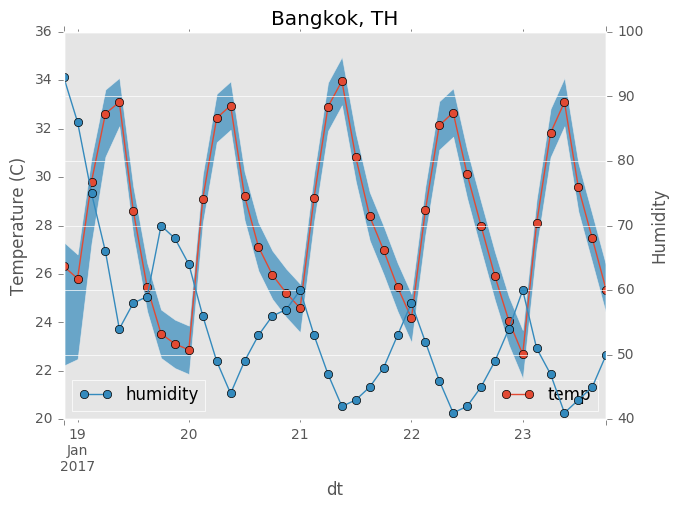

In [7]:
plot_data(bangkok_data, 'Bangkok, TH')

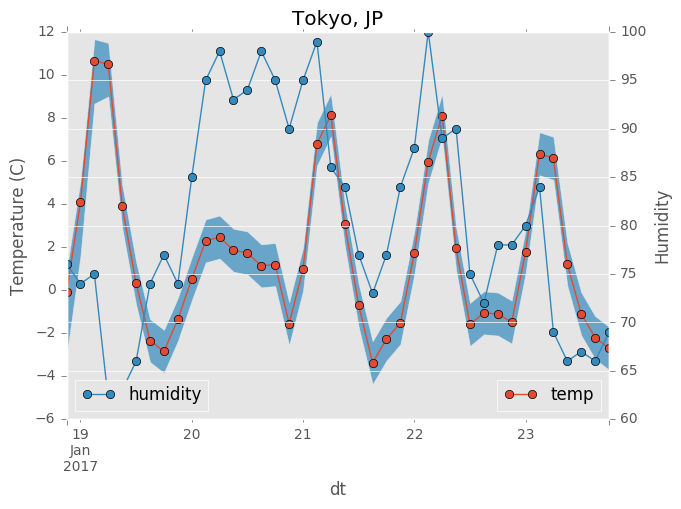

In [8]:
plot_data(tokyo_data, 'Tokyo, JP')

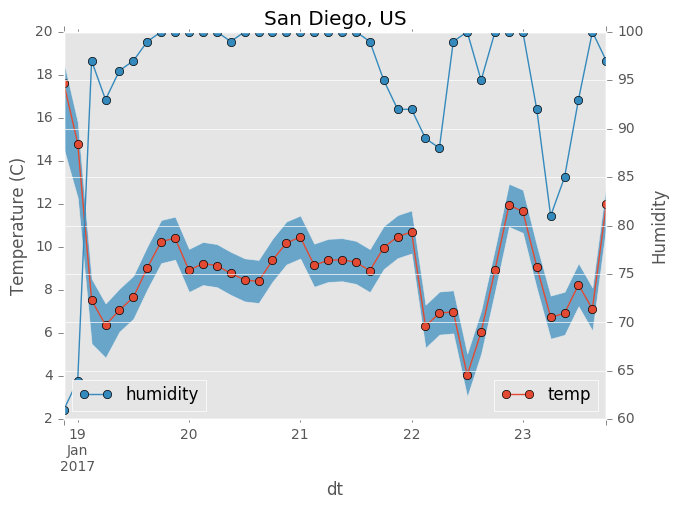

In [9]:
plot_data(san_diego_data, 'San Diego, US')

In [10]:
def extract_data(data, data_type, date=False):
    if date:
        return np.array([obj['dt'] for obj in data])
    return np.array([obj['main'][data_type] for obj in data])

In [11]:
bangkok_humidity = extract_data(bangkok_data['list'], 'humidity')
bangkok_temperature = extract_data(bangkok_data['list'], 'temp')
bangkok_temperature = bangkok_temperature - 273.15 # convert from kelvin to celsius
bangkok_date = extract_data(bangkok_data['list'], 'dt', date=True)

tokyo_humidity = extract_data(tokyo_data['list'], 'humidity')
tokyo_temperature = extract_data(tokyo_data['list'], 'temp')
tokyo_temperature = tokyo_temperature - 273.15 # convert from kelvin to celsius
tokyo_date = extract_data(tokyo_data['list'], 'dt', date=True)

san_diego_humidity = extract_data(san_diego_data['list'], 'humidity')
san_diego_temperature = extract_data(san_diego_data['list'], 'temp')
san_diego_temperature = san_diego_temperature - 273.15 # convert from kelvin to celsius
san_diego_date = extract_data(san_diego_data['list'], 'dt', date=True)

In [12]:
def make_plot(temperature, humidity, title):
    fig, ax1 = plt.subplots()
    # t = bangkok_date
    s1 = temperature
    # ax1.plot(t, s1, 'b')
    ax1.set_title(title)
    ax1.plot(s1, 'b')
    ax1.set_xlabel('time')
    # Make the y-axis label and tick labels match the line color.
    ax1.set_ylabel('temperature (celsius)', color='b')

    for tl in ax1.get_yticklabels():
        tl.set_color('b')

    ax2 = ax1.twinx()
    s2 = humidity
    # ax2.plot(t, s2, 'r')
    ax2.plot(s2, 'r')
    ax2.set_ylabel('humidity', color='r')
    for tl in ax2.get_yticklabels():
        tl.set_color('r')
    plt.show()

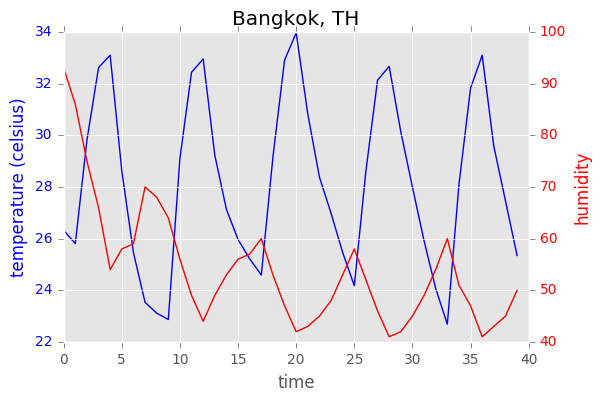

In [13]:
make_plot(bangkok_temperature, bangkok_humidity, 'Bangkok, TH')

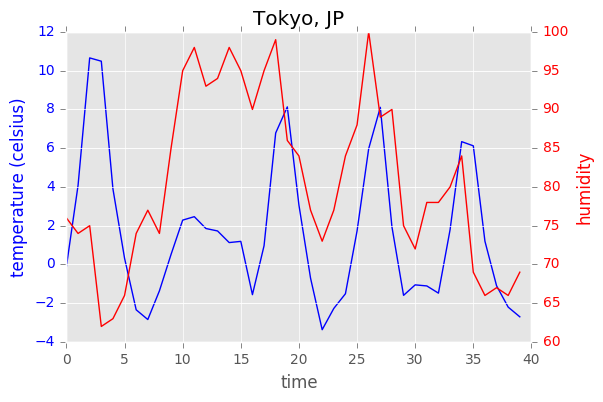

In [14]:
make_plot(tokyo_temperature, tokyo_humidity, 'Tokyo, JP')

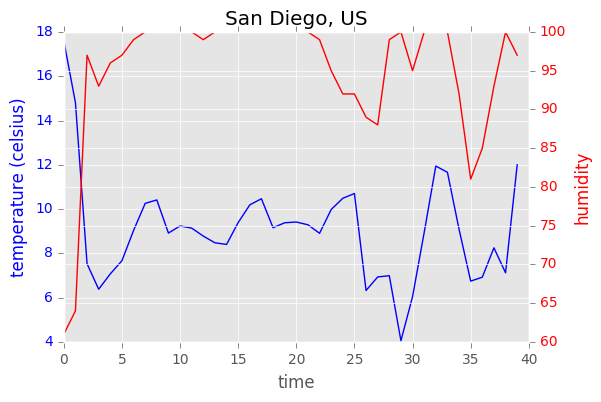

In [15]:
make_plot(san_diego_temperature, san_diego_humidity, 'San Diego, US')

# References

Python Request
--------------

This package should be pre-installed with `conda`.

Let's get started with some simple examples.


Make a Request
--------------

Making a request with Requests is very simple.

Begin by importing the Requests module::

    >>> import requests

Now, let's try to get a webpage. For this example, let's get GitHub's public
timeline::

    >>> r = requests.get('https://api.github.com/events')

Now, we have a :class:`Response <requests.Response>` object called ``r``. We can
get all the information we need from this object.

Requests' simple API means that all forms of HTTP request are as obvious. For
example, this is how you make an HTTP POST request::

    >>> r = requests.post('http://httpbin.org/post', data = {'key':'value'})

Nice, right? What about the other HTTP request types: PUT, DELETE, HEAD and
OPTIONS? These are all just as simple::

    >>> r = requests.put('http://httpbin.org/put', data = {'key':'value'})
    >>> r = requests.delete('http://httpbin.org/delete')
    >>> r = requests.head('http://httpbin.org/get')
    >>> r = requests.options('http://httpbin.org/get')

That's all well and good, but it's also only the start of what Requests can
do.


Passing Parameters In URLs
--------------------------

You often want to send some sort of data in the URL's query string. If
you were constructing the URL by hand, this data would be given as key/value
pairs in the URL after a question mark, e.g. ``httpbin.org/get?key=val``.
Requests allows you to provide these arguments as a dictionary, using the
``params`` keyword argument. As an example, if you wanted to pass
``key1=value1`` and ``key2=value2`` to ``httpbin.org/get``, you would use the
following code::

    >>> payload = {'key1': 'value1', 'key2': 'value2'}
    >>> r = requests.get('http://httpbin.org/get', params=payload)

You can see that the URL has been correctly encoded by printing the URL::

    >>> print(r.url)
    http://httpbin.org/get?key2=value2&key1=value1

Note that any dictionary key whose value is ``None`` will not be added to the
URL's query string.

You can also pass a list of items as a value::

    >>> payload = {'key1': 'value1', 'key2': ['value2', 'value3']}

    >>> r = requests.get('http://httpbin.org/get', params=payload)
    >>> print(r.url)
    http://httpbin.org/get?key1=value1&key2=value2&key2=value3


JSON Response Content
---------------------

There's also a builtin JSON decoder, in case you're dealing with JSON data::

    >>> import requests

    >>> r = requests.get('https://api.github.com/events')
    >>> r.json()
    [{u'repository': {u'open_issues': 0, u'url': 'https://github.com/...

In case the JSON decoding fails, ``r.json()`` raises an exception. For example, if
the response gets a 204 (No Content), or if the response contains invalid JSON,
attempting ``r.json()`` raises ``ValueError: No JSON object could be decoded``.

It should be noted that the success of the call to ``r.json()`` does **not**
indicate the success of the response. Some servers may return a JSON object in a
failed response (e.g. error details with HTTP 500). Such JSON will be decoded
and returned. To check that a request is successful, use
``r.raise_for_status()`` or check ``r.status_code`` is what you expect.

